# **Clean Data Notebook**

## Objectives

- Find and handle missing values
- Convert columns to appropriate data types
- Encode categorical variables

## Inputs

* outputs/datasets/collection/house_prices_records.csv


## Outputs

*  Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned



## Conclusions  
*  To be written after data cleaning.

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\david\\Portfolio 5\\heritage-housing\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\david\\Portfolio 5\\heritage-housing'

## Load Collected Data

In [4]:
import pandas as pd

df_raw_path = "outputs/datasets/collection/house_prices_records.csv"
df = pd.read_csv(df_raw_path)
df.head(3)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


Data Exploration

In Data Cleaning, we want to check the distribution and shape of any  variables with missing data.

In [5]:
import sys
!"{sys.executable}" -m pip install --upgrade ipython ipywidgets ydata-profiling --quiet

In [6]:
from ydata_profiling import ProfileReport

vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()

if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")
profile.to_file("house_prices_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 38.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---

### Drop high missing columns in the data

Drop EnclosedPorch and WoodDeckSF as at least 80% of the data is missing. This makes them unreliable for analysis and avoid skewing calculations.

In [7]:
cols_to_drop = ["EnclosedPorch", "WoodDeckSF"]
df_clean = df.drop(columns=cols_to_drop)

# Check result
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1374 non-null   float64
 2   BedroomAbvGr  1361 non-null   float64
 3   BsmtExposure  1422 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1315 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1225 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1201 non-null   float64
 14  MasVnrArea    1452 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


### Impute numeric columns

Numeric columns may have missing values. For columns where zeros are meaningful, we fill missing values with 0. For the remainder left outstanding, we use the median instead. This preserves the central tendency without being affected by outliers.

In [8]:
numeric_impute_zero = ["MasVnrArea", "2ndFlrSF"]  # zeros are meaningful
numeric_impute_median = ["BedroomAbvGr", "GarageYrBlt", "LotFrontage"]

# Fill with zeros
for col in numeric_impute_zero:
    df_clean[col] = df_clean[col].fillna(0)

# Use median value
for col in numeric_impute_median:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)

# Check numeric columns for missing
df_clean[numeric_impute_zero + numeric_impute_median].isna().sum()

MasVnrArea      0
2ndFlrSF        0
BedroomAbvGr    0
GarageYrBlt     0
LotFrontage     0
dtype: int64

### Fill categorical columns

Categorical columns which have missing values can cause errors in analysis and modeling. Missing entries will be filled with "None" to indicate absence and maintain consistency.

In [9]:
categorical_cols = ["BsmtExposure", "BsmtFinType1", "GarageFinish"]

for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna("None")

# Check categorical columns for missing
df_clean[categorical_cols].isna().sum()
df_clean[categorical_cols].head()

,BsmtExposure,BsmtFinType1,GarageFinish
0,No,GLQ,RFn
1,Gd,ALQ,RFn
2,Mn,GLQ,RFn
3,No,ALQ,Unf
4,Av,GLQ,RFn


### Encode categorical columns

Machine learning algorithms and correlation calculations understand numeric input. To conform with this, we convert categorical variables into numeric format using one-hot encoding, creating a separate column for each category.

In [10]:
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Inspect result
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   1stFlrSF           1460 non-null   int64  
 1   2ndFlrSF           1460 non-null   float64
 2   BedroomAbvGr       1460 non-null   float64
 3   BsmtFinSF1         1460 non-null   int64  
 4   BsmtUnfSF          1460 non-null   int64  
 5   GarageArea         1460 non-null   int64  
 6   GarageYrBlt        1460 non-null   float64
 7   GrLivArea          1460 non-null   int64  
 8   KitchenQual        1460 non-null   object 
 9   LotArea            1460 non-null   int64  
 10  LotFrontage        1460 non-null   float64
 11  MasVnrArea         1460 non-null   float64
 12  OpenPorchSF        1460 non-null   int64  
 13  OverallCond        1460 non-null   int64  
 14  OverallQual        1460 non-null   int64  
 15  TotalBsmtSF        1460 non-null   int64  
 16  YearBuilt          1460 

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,KitchenQual,LotArea,...,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,856,854.0,3.0,706,150,548,2003.0,1710,Gd,8450,...,False,False,True,False,False,False,False,False,True,False
1,1262,0.0,3.0,978,284,460,1976.0,1262,TA,9600,...,False,False,False,False,False,False,False,False,True,False
2,920,866.0,3.0,486,434,608,2001.0,1786,Gd,11250,...,False,False,True,False,False,False,False,False,True,False
3,961,0.0,3.0,216,540,642,1998.0,1717,Gd,9550,...,False,False,False,False,False,False,False,False,False,True
4,1145,0.0,4.0,655,490,836,2000.0,2198,Gd,14260,...,False,False,True,False,False,False,False,False,True,False


### Encode KitchenQual ordinally
KitchenQual remains an object so we want to ordinally encode this. It describes the kitchen quality on a scale from Fair to Excellent so the numerical values will have ordinal importance. We convert it to numeric values so models and correlation/PPS can understand the ordering. Higher numbers correspond to better quality.

In [11]:
kitchen_mapping = {
    "Ex": 4,  # Excellent
    "Gd": 3,  # Good
    "TA": 2,  # Typical/Average
    "Fa": 1   # Fair
}

df_encoded["KitchenQual"] = df_encoded["KitchenQual"].map(kitchen_mapping)

# Verify the encoding
df_encoded[["KitchenQual"]].head()

,KitchenQual
0,3
1,2
2,3
3,3
4,3


## Correlation and PPS Analysis

We want to understand how features relate to each other and to the target variable (SalePrice). We will do this both linearly and non-linearly. We will use:
- **Pearson correlation** for linear relationships
- **Spearman correlation** for monotonic relationships
- **Power Predictive Score (PPS)** to detect predictive power, even if relationships are non-linear

### Import Required Libraries

We import the libraries needed to compute correlations, generate visualisations, and calculate the Power Predictive Score (PPS).
Power Predictive Score (PPS) was planned for this analysis. However, the `ppscore` library is currently incompatible with Python 3.12.  
Proceed with Pearson and Spearman correlations to analyse linear and monotonic relationships.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Define Correlation Heatmap Function

A helper function is used to visualise correlation matrices using heatmaps.  
Thresholding is applied to highlight only meaningful correlations and reduce visual noise.


In [19]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        plt.figure(figsize=figsize)
        sns.heatmap(
            df,
            annot=True,
            mask=mask,
            cmap='viridis',
            annot_kws={"size": font_annot},
            linewidth=0.5
        )
        plt.ylim(len(df.columns), 0)
        plt.show()


### Calculate Pearson and Spearman Correlations

We calculate Pearson correlation to evaluate linear relationships. We calculate Spearman correlation to evaluate monotonic relationships between numerical features and the target variable.


In [20]:
df_corr_pearson = df_encoded.corr(method="pearson", numeric_only=True)
df_corr_spearman = df_encoded.corr(method="spearman", numeric_only=True)

### Pearson Correlation Heatmap

This heatmap highlights strong linear relationships between features and SalePrice.

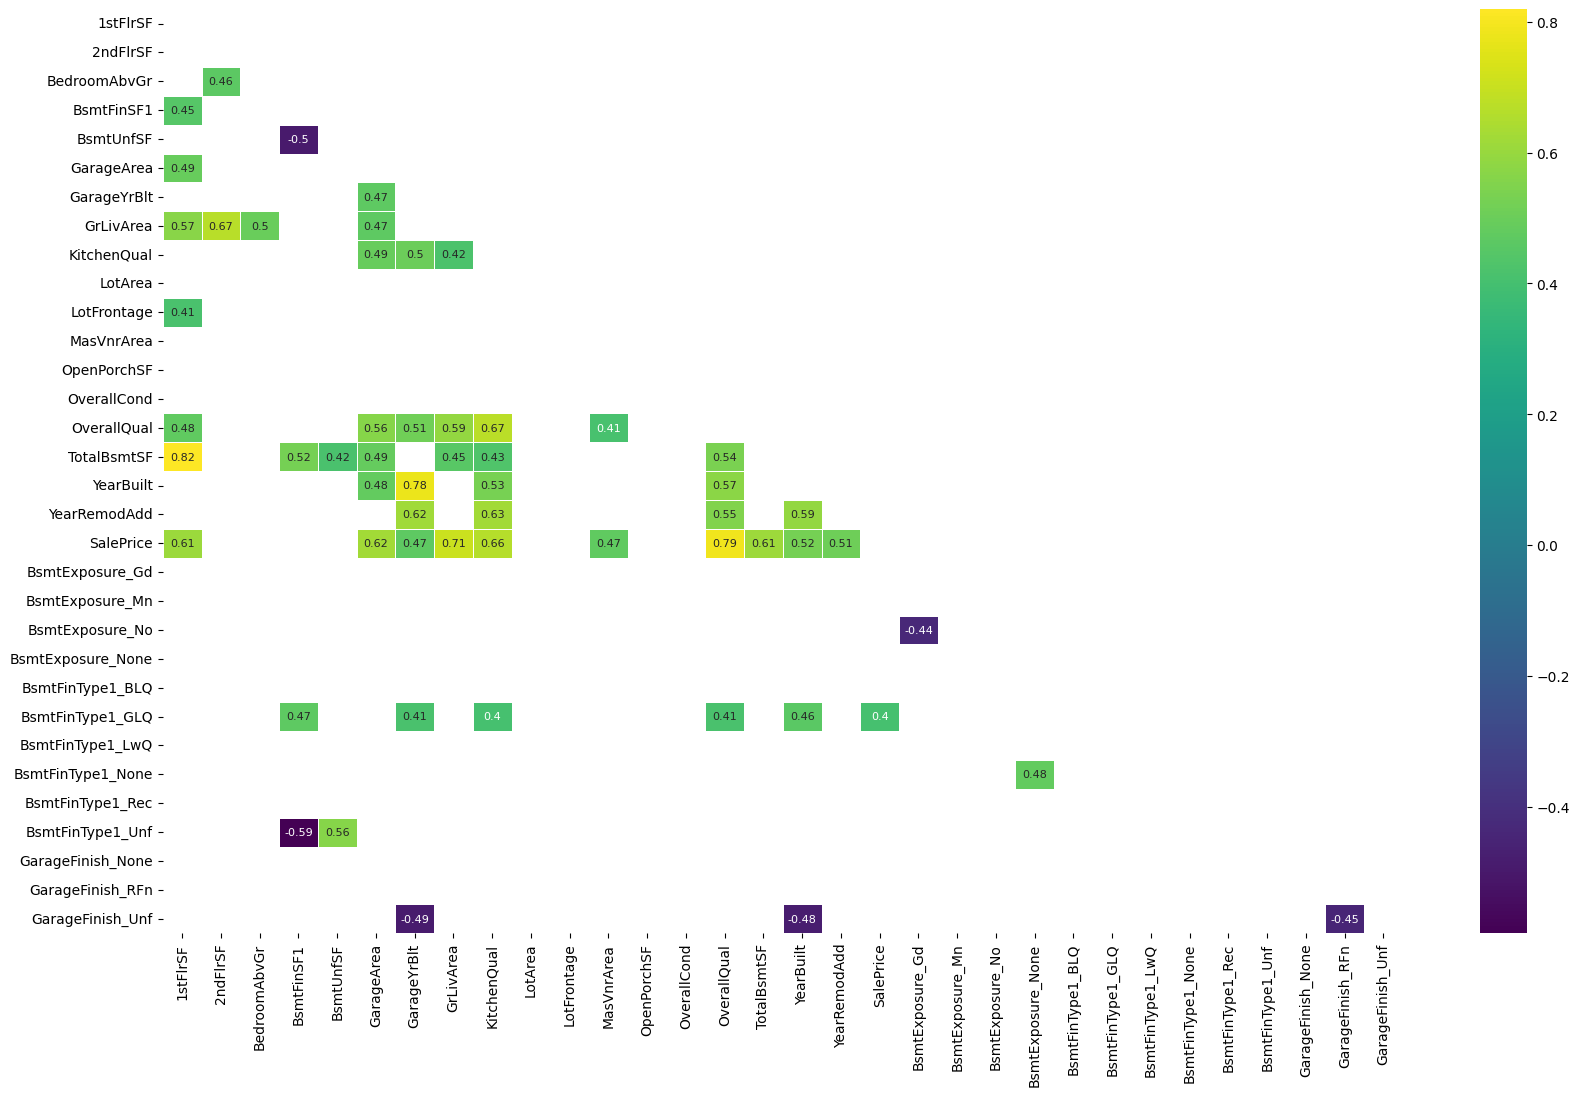

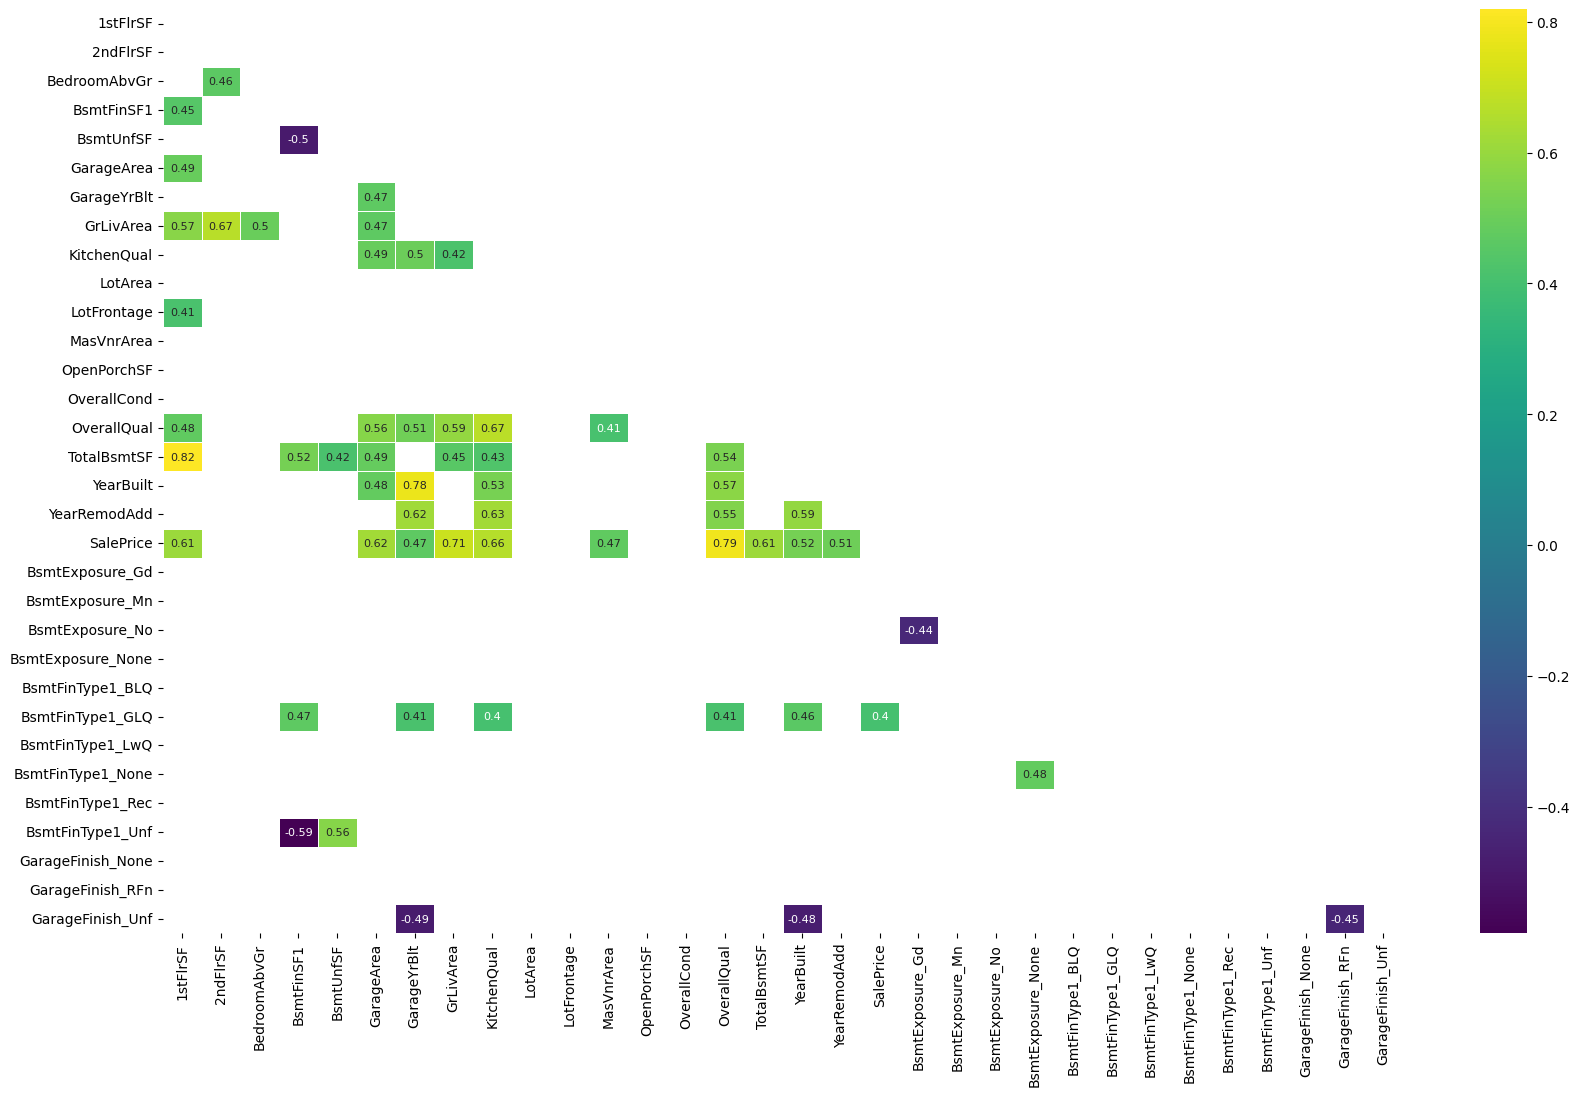

In [21]:
heatmap_corr(df_corr_pearson, threshold=0.4)

### Spearman Correlation Heatmap

This heatmap captures monotonic relationships that may not be strictly linear, providing additional insight into feature importance.

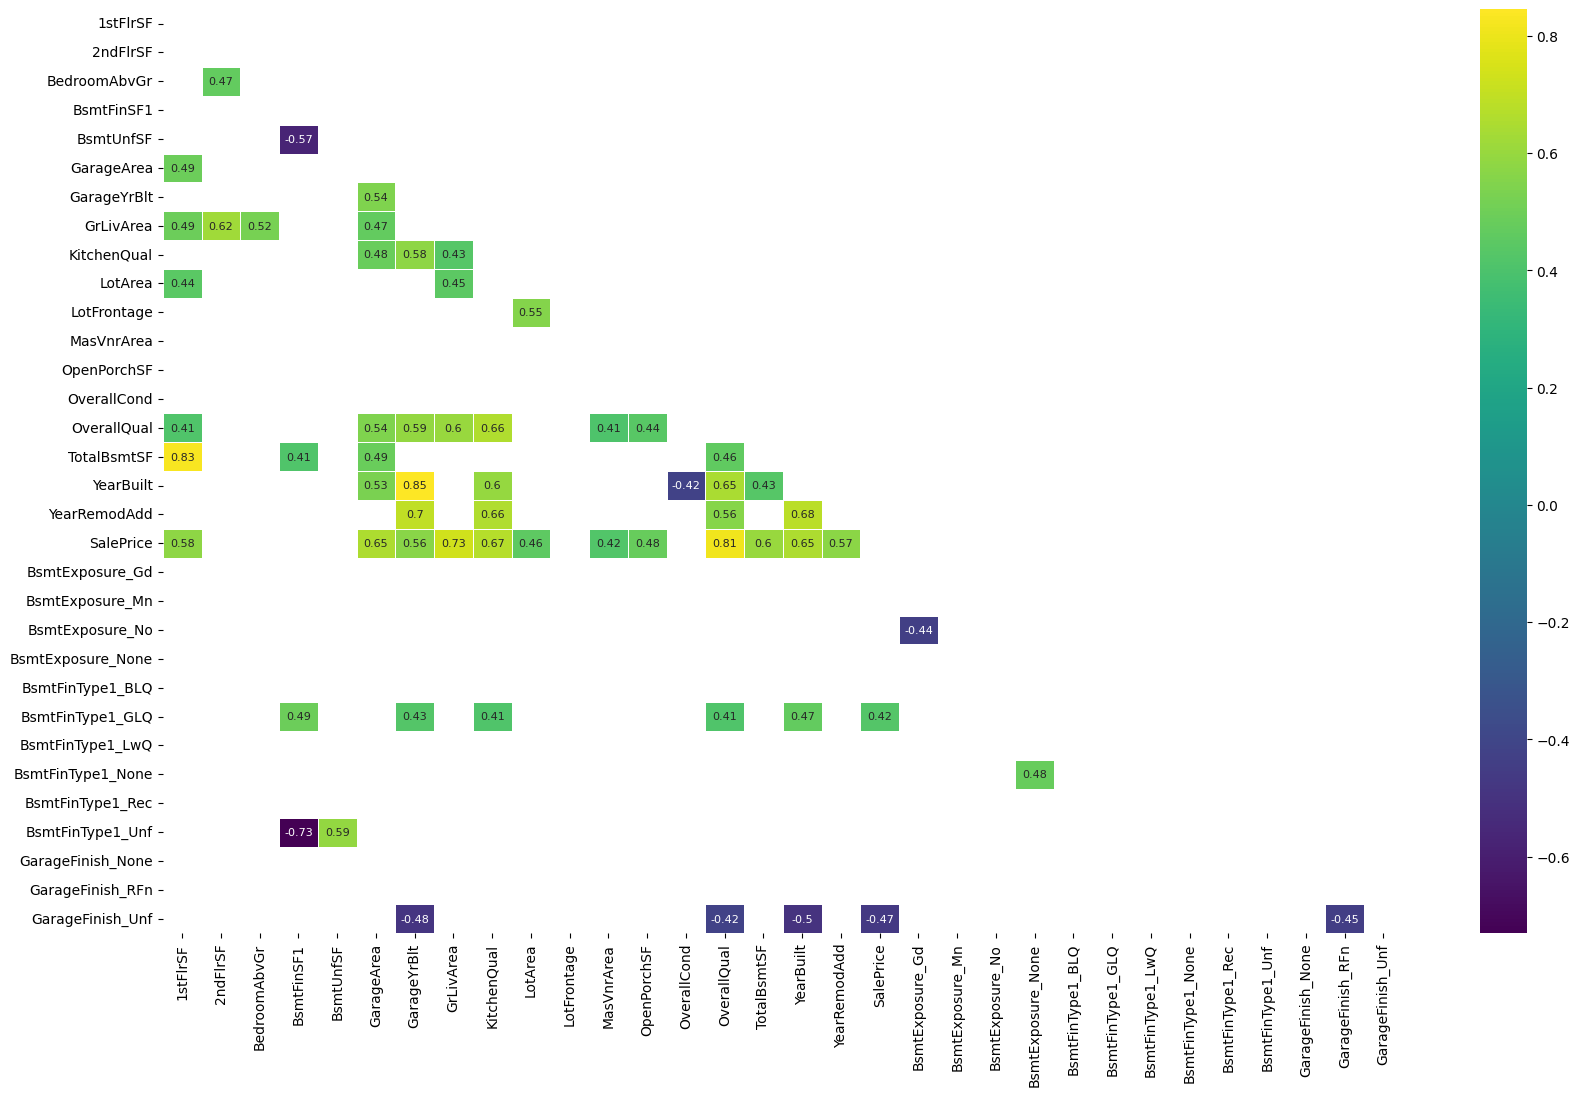

In [22]:
heatmap_corr(df_corr_spearman, threshold=0.4)


### Key Observations from Correlation Analysis

From the correlation analysis, we observe:
- Strong positive correlations between SalePrice and features such as OverallQual and GrLivArea
- Moderate correlations with size-related features such as TotalBsmtSF and GarageArea
- Evidence of multicollinearity among size-related variables, suggesting potential feature redundancy

These findings will inform feature selection and transformation in the next stage: **Feature Engineering**.


## ### Final Checks and Saving Cleaned Data

Perform a final check for missing data and save the cleaned train and test datasets.

In [26]:
# Check for any remaining missing data
total_missing = df_clean.isnull().sum().sum()
print(f"Remaining missing data in dataset: {total_missing}")

# List columns with missing data (if any)
missing_cols = df_clean.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
if not missing_cols.empty:
    print("\nColumns with remaining missing data:")
    print(missing_cols)
else:
    print("\nNo missing data remaining. Dataset is clean!")


print("\nFirst 5 rows of cleaned dataset:")
print(df_clean.head())

print("\nData types of cleaned dataset:")
print(df_clean.dtypes)

# Save cleaned dataset
import os
os.makedirs('outputs/datasets/cleaned', exist_ok=True)
df_clean.to_csv('outputs/datasets/cleaned/CleanedData.csv', index=False)
print("\nCleaned dataset saved at 'outputs/datasets/cleaned/CleanedData.csv'")



Remaining missing data in dataset: 0

No missing data remaining. Dataset is clean!

First 5 rows of cleaned dataset:
   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       0.0           3.0           No         216          ALQ   
4      1145       0.0           4.0           Av         655          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn       2003.0  ...     8450        65.0   
1        284         460          RFn       1976.0  ...     9600        80.0   
2        434         608          RFn       2001.0  ...    11250        68.0   
3        540         642          Unf       1998.0  ...     9550        60.0   
4        490        